<a href="https://colab.research.google.com/github/Sarith99/stock-price-forecasting-prediction/blob/main/Stock_Price_Forcasting_%26_Prediction_System_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The dataset is download from following website. 
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400
...,...,...,...,...,...,...,...
9301,2023-02-07,260.529999,268.769989,260.079987,267.559998,267.559998,50841400
9302,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.730011,54686000
9303,2023-02-09,273.799988,273.980011,262.799988,263.619995,263.619995,42375100
9304,2023-02-10,261.529999,264.089996,260.660004,263.100006,263.100006,25760900


In [ ]:
# Open selected columns

df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9301,2023-02-07,267.559998
9302,2023-02-08,266.730011
9303,2023-02-09,263.619995
9304,2023-02-10,263.100006


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9301    2023-02-07
9302    2023-02-08
9303    2023-02-09
9304    2023-02-10
9305    2023-02-13
Name: Date, Length: 9306, dtype: object

In [ ]:
# Converting the data in Date column into date type

import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day =  int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [ ]:
# Apply above function to whole date column
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-8-d36291d5c924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9301   2023-02-07
9302   2023-02-08
9303   2023-02-09
9304   2023-02-10
9305   2023-02-13
Name: Date, Length: 9306, dtype: datetime64[ns]

In [ ]:
# Remove the Index column and it replace with Date column.
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-02-07,267.559998
2023-02-08,266.730011
2023-02-09,263.619995


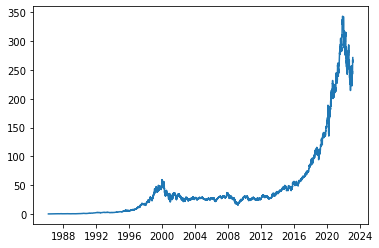

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
# Since we use LSTM model, the above data frame should convert into supervised learning problem.
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Traget Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df 

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2023-02-13',
                                n=3)
windowed_df

,Traget Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
471,2023-02-07,264.600006,258.350006,256.769989,267.559998
472,2023-02-08,258.350006,256.769989,267.559998,266.730011
473,2023-02-09,256.769989,267.559998,266.730011,263.619995
474,2023-02-10,267.559998,266.730011,263.619995,263.100006


In [ ]:
# Converting into numpy arrays
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np =  windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((476,), (476, 3, 1), (476,))

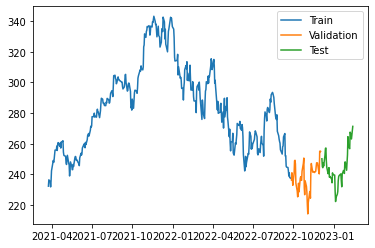

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer = Adam(learning_rate=0.001),
              metrics = ['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100)

Epoch 1/100
12/12 [==============================] - 3s 47ms/step - loss: 81522.2500 - mean_absolute_error: 284.1915 - val_loss: 56562.1055 - val_mean_absolute_error: 237.6405
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 81262.2734 - mean_absolute_error: 283.7320 - val_loss: 56334.0586 - val_mean_absolute_error: 237.1602
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 80945.4375 - mean_absolute_error: 283.1742 - val_loss: 56012.1094 - val_mean_absolute_error: 236.4805
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 80488.8125 - mean_absolute_error: 282.3657 - val_loss: 55525.1055 - val_mean_absolute_error: 235.4484
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 79699.2188 - mean_absolute_error: 280.9675 - val_loss: 54575.6445 - val_mean_absolute_error: 233.4234
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 78358.2422 - mean_absolute_error: 278.5731 - val_lo

12/12 [==============================] - 0s 2ms/step


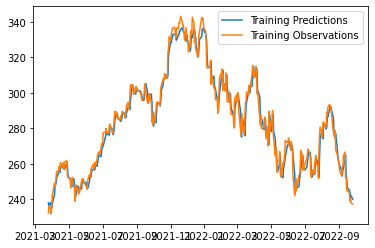

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 6ms/step


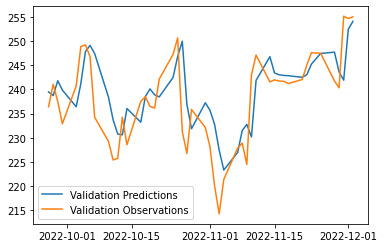

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 5ms/step


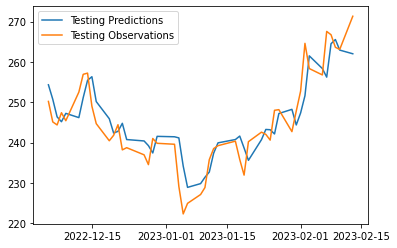

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

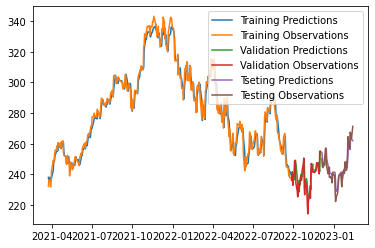

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Tseting Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


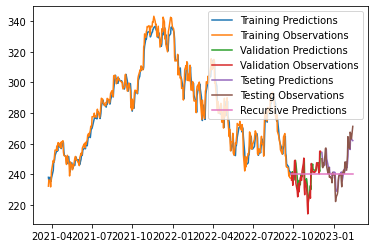

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Tseting Predictions',
            'Testing Observations',
            'Recursive Predictions'])